### Bureau of Transportation Statistics Airline On-time Statistics and Delay Data Analysis
## by Cherie Goodenough

Demonstrate univariate, bivariate and multivariate data visualization using a large flight delay dataset from the FAA.



## Preliminary Wrangling

> The data used in this analysis was downloaded as a csv file from this website: http://stat-computing.org/dataexpo/2009/the-data.html

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
plt.style.use('fivethirtyeight')

> Load the datasets as a pandas dataframe

In [2]:
df2008 = pd.read_csv('2008_flight_data.csv')

In [3]:
df1998 = pd.read_csv('1998_flight_data.csv')

First question: do they have the same columns?

In [4]:
col2008 = df2008.columns.tolist()
col1998 = df1998.columns.tolist()

In [5]:
col2008 == col1998

True

In [6]:
col2008

['Year',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'DepTime',
 'CRSDepTime',
 'ArrTime',
 'CRSArrTime',
 'UniqueCarrier',
 'FlightNum',
 'TailNum',
 'ActualElapsedTime',
 'CRSElapsedTime',
 'AirTime',
 'ArrDelay',
 'DepDelay',
 'Origin',
 'Dest',
 'Distance',
 'TaxiIn',
 'TaxiOut',
 'Cancelled',
 'CancellationCode',
 'Diverted',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay']

In [7]:
df2008.info() # Note that not displaying entries is standard behavior for large datasets whose rows exceed
            # max_num_rows. See https://github.com/pandas-dev/pandas/issues/6940

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 1.5+ GB


In [8]:
pd.options.display.max_info_rows = 7100000

In [9]:
df2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 29 columns):
Year                 7009728 non-null int64
Month                7009728 non-null int64
DayofMonth           7009728 non-null int64
DayOfWeek            7009728 non-null int64
DepTime              6873482 non-null float64
CRSDepTime           7009728 non-null int64
ArrTime              6858079 non-null float64
CRSArrTime           7009728 non-null int64
UniqueCarrier        7009728 non-null object
FlightNum            7009728 non-null int64
TailNum              6926363 non-null object
ActualElapsedTime    6855029 non-null float64
CRSElapsedTime       7008884 non-null float64
AirTime              6855029 non-null float64
ArrDelay             6855029 non-null float64
DepDelay             6873482 non-null float64
Origin               7009728 non-null object
Dest                 7009728 non-null object
Distance             7009728 non-null int64
TaxiIn               6858079 non-

In [10]:
df1998.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5384721 entries, 0 to 5384720
Data columns (total 29 columns):
Year                 5384721 non-null int64
Month                5384721 non-null int64
DayofMonth           5384721 non-null int64
DayOfWeek            5384721 non-null int64
DepTime              5240212 non-null float64
CRSDepTime           5384721 non-null int64
ArrTime              5227051 non-null float64
CRSArrTime           5384721 non-null int64
UniqueCarrier        5384721 non-null object
FlightNum            5384721 non-null int64
TailNum              5384721 non-null object
ActualElapsedTime    5227051 non-null float64
CRSElapsedTime       5382335 non-null float64
AirTime              5227051 non-null float64
ArrDelay             5227051 non-null float64
DepDelay             5240212 non-null float64
Origin               5384721 non-null object
Dest                 5384721 non-null object
Distance             5384721 non-null int64
TaxiIn               5384721 non-

In [11]:
dfcols = pd.read_csv('column_descriptions.csv') # needed to save UTF-8 not standard csv

In [12]:
df2008.head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,...,3.0,7.0,0,NaN,0,10.0,0.0,0.0,0.0,47.0
7,2008,1,3,4,1039.0,1040,1132.0,1150,WN,535,...,7.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
8,2008,1,3,4,617.0,615,652.0,650,WN,11,...,6.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9,2008,1,3,4,1620.0,1620,1639.0,1655,WN,810,...,3.0,6.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [13]:
len(df2008.UniqueCarrier.unique())

20

In [14]:
df1998.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1998,1,17,6,715.0,715,840.0,840,WN,76,...,3,5,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1998,1,18,7,715.0,715,830.0,840,WN,76,...,2,6,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,1998,1,19,1,715.0,715,831.0,840,WN,76,...,3,5,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,1998,1,20,2,715.0,715,836.0,840,WN,76,...,3,12,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,1998,1,21,3,715.0,715,836.0,840,WN,76,...,3,6,0,NaN,0,NaN,NaN,NaN,NaN,NaN


### Structure of dataset

> The data consist of two csv files with 29 columns, described below. The files are quite large, with 5M+ rows of observations per year. Note that the 1998 dataset does not have information on the reason for the delays that is present in the 2008 dataset.

### Main feature(s) of interest

> There are a lot of interesting features in this data. Investigations into delays as a function of time of day, day of the week, month, departure and arrival airports, carrier, and scheduled flight time (scheduled arrival minus scheduled departure) could all produce interesting analysis. Having data for two years a decade apart allows for the investigation of long-term changes in delays.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> For this visualization, I will compare overall delays and by airline to look for changes in the decade between 1998 and 2008.

Note that <a href="https://aspmhelp.faa.gov/index.php/Types_of_Delay" target="_blank">"NAS Delay. Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc. Delays that occur after Actual Gate Out are usually attributed to the NAS and are also reported through OPSNET."</a>

### Column descriptions:

In [15]:
pd.set_option('display.max_colwidth',-1)
dfcols

,Name,Description
0,Year,1987-2008
1,Month,12-Jan
2,DayofMonth,31-Jan
3,DayOfWeek,1 (Monday) - 7 (Sunday)
4,DepTime,"actual departure time (local, hhmm)"
5,CRSDepTime,"scheduled departure time (local, hhmm)"
6,ArrTime,"actual arrival time (local, hhmm)"
7,CRSArrTime,"scheduled arrival time (local, hhmm)"
8,UniqueCarrier,unique carrier code
9,FlightNum,flight number


We'll also want to decode the airport and carrier codes. These are found in supplemental data at 
http://stat-computing.org/dataexpo/2009/supplemental-data.html

In [16]:
dfcarrier = pd.read_csv('carriers.csv')
dfairport = pd.read_csv('airports.csv')

In [17]:
dfcarrier.head(10)

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.
5,09Q,"Swift Air, LLC"
6,0BQ,DCA
7,0CQ,ACM AIR CHARTER GmbH
8,0FQ,"Maine Aviation Aircraft Charter, LLC"
9,0GQ,"Inter Island Airways, d/b/a Inter Island Air"


In [18]:
dfairport.head(10)

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944
5,01M,Tishomingo County,Belmont,MS,USA,34.491667,-88.201111
6,02A,Gragg-Wade,Clanton,AL,USA,32.850487,-86.611453
7,02C,Capitol,Brookfield,WI,USA,43.087510,-88.177869
8,02G,Columbiana County,East Liverpool,OH,USA,40.673313,-80.641406
9,03D,Memphis Memorial,Memphis,MO,USA,40.447259,-92.226961


## Data Cleaning

#### Define
Merge carrier data into main datasets
1. Left merge on Origin, right on iata. Drop iata after merge

#### Code:

In [19]:
df08clean = pd.merge(df2008,dfairport,left_on='Origin',right_on='iata',how='left').drop('iata',axis=1)

#### Test:

In [20]:
df08clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7009728 entries, 0 to 7009727
Data columns (total 35 columns):
Year                 7009728 non-null int64
Month                7009728 non-null int64
DayofMonth           7009728 non-null int64
DayOfWeek            7009728 non-null int64
DepTime              6873482 non-null float64
CRSDepTime           7009728 non-null int64
ArrTime              6858079 non-null float64
CRSArrTime           7009728 non-null int64
UniqueCarrier        7009728 non-null object
FlightNum            7009728 non-null int64
TailNum              6926363 non-null object
ActualElapsedTime    6855029 non-null float64
CRSElapsedTime       7008884 non-null float64
AirTime              6855029 non-null float64
ArrDelay             6855029 non-null float64
DepDelay             6873482 non-null float64
Origin               7009728 non-null object
Dest                 7009728 non-null object
Distance             7009728 non-null int64
TaxiIn               6858079 non-

In [21]:
df08clean.head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,airport,city,state,country,lat,long
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,NaN,NaN,NaN,NaN,Washington Dulles International,Chantilly,VA,USA,38.944532,-77.455810
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,NaN,NaN,NaN,NaN,Washington Dulles International,Chantilly,VA,USA,38.944532,-77.455810
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,NaN,NaN,NaN,NaN,Indianapolis International,Indianapolis,IN,USA,39.717329,-86.294384
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,NaN,NaN,NaN,NaN,Indianapolis International,Indianapolis,IN,USA,39.717329,-86.294384
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,0.0,0.0,0.0,32.0,Indianapolis International,Indianapolis,IN,USA,39.717329,-86.294384
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,NaN,NaN,NaN,NaN,Indianapolis International,Indianapolis,IN,USA,39.717329,-86.294384
6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,...,0.0,0.0,0.0,47.0,Indianapolis International,Indianapolis,IN,USA,39.717329,-86.294384
7,2008,1,3,4,1039.0,1040,1132.0,1150,WN,535,...,NaN,NaN,NaN,NaN,Indianapolis International,Indianapolis,IN,USA,39.717329,-86.294384
8,2008,1,3,4,617.0,615,652.0,650,WN,11,...,NaN,NaN,NaN,NaN,Indianapolis International,Indianapolis,IN,USA,39.717329,-86.294384
9,2008,1,3,4,1620.0,1620,1639.0,1655,WN,810,...,NaN,NaN,NaN,NaN,Indianapolis International,Indianapolis,IN,USA,39.717329,-86.294384


#### Define:
Rename airport column to specify it as origin

#### Code:

In [22]:
df08clean.rename(columns={'airport' : 'orig_airport','city':'orig_city','state':'orig_state','country':'orig_country',
                          'lat':'orig_lat','long':'orig_long'},inplace=True)

#### Test

In [23]:
df08clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7009728 entries, 0 to 7009727
Data columns (total 35 columns):
Year                 7009728 non-null int64
Month                7009728 non-null int64
DayofMonth           7009728 non-null int64
DayOfWeek            7009728 non-null int64
DepTime              6873482 non-null float64
CRSDepTime           7009728 non-null int64
ArrTime              6858079 non-null float64
CRSArrTime           7009728 non-null int64
UniqueCarrier        7009728 non-null object
FlightNum            7009728 non-null int64
TailNum              6926363 non-null object
ActualElapsedTime    6855029 non-null float64
CRSElapsedTime       7008884 non-null float64
AirTime              6855029 non-null float64
ArrDelay             6855029 non-null float64
DepDelay             6873482 non-null float64
Origin               7009728 non-null object
Dest                 7009728 non-null object
Distance             7009728 non-null int64
TaxiIn               6858079 non-

Repeat for destination airport

In [24]:
df08clean = pd.merge(df08clean,dfairport,left_on='Dest',right_on='iata',how='left').drop('iata',axis=1)
df08clean.rename(columns={'airport' : 'dest_airport','city':'dest_city','state':'dest_state','country':'dest_country',
                          'lat':'dest_lat','long':'dest_long'},inplace=True)
df08clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7009728 entries, 0 to 7009727
Data columns (total 41 columns):
Year                 7009728 non-null int64
Month                7009728 non-null int64
DayofMonth           7009728 non-null int64
DayOfWeek            7009728 non-null int64
DepTime              6873482 non-null float64
CRSDepTime           7009728 non-null int64
ArrTime              6858079 non-null float64
CRSArrTime           7009728 non-null int64
UniqueCarrier        7009728 non-null object
FlightNum            7009728 non-null int64
TailNum              6926363 non-null object
ActualElapsedTime    6855029 non-null float64
CRSElapsedTime       7008884 non-null float64
AirTime              6855029 non-null float64
ArrDelay             6855029 non-null float64
DepDelay             6873482 non-null float64
Origin               7009728 non-null object
Dest                 7009728 non-null object
Distance             7009728 non-null int64
TaxiIn               6858079 non-

And finally for carrier code:

In [25]:
df08clean = pd.merge(df08clean,dfcarrier,left_on='UniqueCarrier',right_on='Code',how='left').drop('Code',axis=1)
df08clean.rename(columns={'Description':'Airline'},inplace=True)
df08clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7009728 entries, 0 to 7009727
Data columns (total 42 columns):
Year                 7009728 non-null int64
Month                7009728 non-null int64
DayofMonth           7009728 non-null int64
DayOfWeek            7009728 non-null int64
DepTime              6873482 non-null float64
CRSDepTime           7009728 non-null int64
ArrTime              6858079 non-null float64
CRSArrTime           7009728 non-null int64
UniqueCarrier        7009728 non-null object
FlightNum            7009728 non-null int64
TailNum              6926363 non-null object
ActualElapsedTime    6855029 non-null float64
CRSElapsedTime       7008884 non-null float64
AirTime              6855029 non-null float64
ArrDelay             6855029 non-null float64
DepDelay             6873482 non-null float64
Origin               7009728 non-null object
Dest                 7009728 non-null object
Distance             7009728 non-null int64
TaxiIn               6858079 non-

Do all of this for 1998

In [26]:
df98clean = pd.merge(df1998,dfairport,left_on='Origin',right_on='iata',how='left').drop('iata',axis=1)
df98clean.rename(columns={'airport' : 'orig_airport','city':'orig_city','state':'orig_state','country':'orig_country',
                          'lat':'orig_lat','long':'orig_long'},inplace=True)
df98clean = pd.merge(df98clean,dfairport,left_on='Dest',right_on='iata',how='left').drop('iata',axis=1)
df98clean.rename(columns={'airport' : 'dest_airport','city':'dest_city','state':'dest_state','country':'dest_country',
                          'lat':'dest_lat','long':'dest_long'},inplace=True)
df98clean = pd.merge(df98clean,dfcarrier,left_on='UniqueCarrier',right_on='Code',how='left').drop('Code',axis=1)
df98clean.rename(columns={'Description':'Airline'},inplace=True)
df98clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5384721 entries, 0 to 5384720
Data columns (total 42 columns):
Year                 5384721 non-null int64
Month                5384721 non-null int64
DayofMonth           5384721 non-null int64
DayOfWeek            5384721 non-null int64
DepTime              5240212 non-null float64
CRSDepTime           5384721 non-null int64
ArrTime              5227051 non-null float64
CRSArrTime           5384721 non-null int64
UniqueCarrier        5384721 non-null object
FlightNum            5384721 non-null int64
TailNum              5384721 non-null object
ActualElapsedTime    5227051 non-null float64
CRSElapsedTime       5382335 non-null float64
AirTime              5227051 non-null float64
ArrDelay             5227051 non-null float64
DepDelay             5240212 non-null float64
Origin               5384721 non-null object
Dest                 5384721 non-null object
Distance             5384721 non-null int64
TaxiIn               5384721 non-

#### Define:
Drop delay reasons columns, since these were not reported in 1998.

#### Code:

In [27]:
dropcols = ['CancellationCode','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']
df98clean.drop(columns=dropcols,axis=1,inplace=True)
df08clean.drop(columns=dropcols,axis=1,inplace=True)

#### Test

In [28]:
df98clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5384721 entries, 0 to 5384720
Data columns (total 36 columns):
Year                 5384721 non-null int64
Month                5384721 non-null int64
DayofMonth           5384721 non-null int64
DayOfWeek            5384721 non-null int64
DepTime              5240212 non-null float64
CRSDepTime           5384721 non-null int64
ArrTime              5227051 non-null float64
CRSArrTime           5384721 non-null int64
UniqueCarrier        5384721 non-null object
FlightNum            5384721 non-null int64
TailNum              5384721 non-null object
ActualElapsedTime    5227051 non-null float64
CRSElapsedTime       5382335 non-null float64
AirTime              5227051 non-null float64
ArrDelay             5227051 non-null float64
DepDelay             5240212 non-null float64
Origin               5384721 non-null object
Dest                 5384721 non-null object
Distance             5384721 non-null int64
TaxiIn               5384721 non-

In [29]:
df08clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7009728 entries, 0 to 7009727
Data columns (total 36 columns):
Year                 7009728 non-null int64
Month                7009728 non-null int64
DayofMonth           7009728 non-null int64
DayOfWeek            7009728 non-null int64
DepTime              6873482 non-null float64
CRSDepTime           7009728 non-null int64
ArrTime              6858079 non-null float64
CRSArrTime           7009728 non-null int64
UniqueCarrier        7009728 non-null object
FlightNum            7009728 non-null int64
TailNum              6926363 non-null object
ActualElapsedTime    6855029 non-null float64
CRSElapsedTime       7008884 non-null float64
AirTime              6855029 non-null float64
ArrDelay             6855029 non-null float64
DepDelay             6873482 non-null float64
Origin               7009728 non-null object
Dest                 7009728 non-null object
Distance             7009728 non-null int64
TaxiIn               6858079 non-

#### Define:
Drop rows with null values.

#### Code:

In [30]:
df98clean.dropna(inplace=True)
df08clean.dropna(inplace=True)

#### Test

In [31]:
df98clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5227051 entries, 0 to 5384720
Data columns (total 36 columns):
Year                 5227051 non-null int64
Month                5227051 non-null int64
DayofMonth           5227051 non-null int64
DayOfWeek            5227051 non-null int64
DepTime              5227051 non-null float64
CRSDepTime           5227051 non-null int64
ArrTime              5227051 non-null float64
CRSArrTime           5227051 non-null int64
UniqueCarrier        5227051 non-null object
FlightNum            5227051 non-null int64
TailNum              5227051 non-null object
ActualElapsedTime    5227051 non-null float64
CRSElapsedTime       5227051 non-null float64
AirTime              5227051 non-null float64
ArrDelay             5227051 non-null float64
DepDelay             5227051 non-null float64
Origin               5227051 non-null object
Dest                 5227051 non-null object
Distance             5227051 non-null int64
TaxiIn               5227051 non-

In [32]:
df08clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6845792 entries, 0 to 7009727
Data columns (total 36 columns):
Year                 6845792 non-null int64
Month                6845792 non-null int64
DayofMonth           6845792 non-null int64
DayOfWeek            6845792 non-null int64
DepTime              6845792 non-null float64
CRSDepTime           6845792 non-null int64
ArrTime              6845792 non-null float64
CRSArrTime           6845792 non-null int64
UniqueCarrier        6845792 non-null object
FlightNum            6845792 non-null int64
TailNum              6845792 non-null object
ActualElapsedTime    6845792 non-null float64
CRSElapsedTime       6845792 non-null float64
AirTime              6845792 non-null float64
ArrDelay             6845792 non-null float64
DepDelay             6845792 non-null float64
Origin               6845792 non-null object
Dest                 6845792 non-null object
Distance             6845792 non-null int64
TaxiIn               6845792 non-

In [33]:
df08clean.to_csv('clean_2008.csv')
df98clean.to_csv('clean_1998.csv')

Now I will free up some memory by getting rid of earlier dataframes

In [34]:
del [[df1998,df2008]]
import gc
gc.collect()
df1998 = pd.DataFrame()
df2008 = pd.DataFrame()

## Univariate Exploration

Has the number of flights changed over time?

In [35]:
flights08 = len(df08clean)
flights98 = len(df98clean)
print(flights98,flights08)

5227051 6845792


Not surprising that there was an increase in the number of flights over the decade.

Let's look at the change in market share over the decade in question

In [36]:
df08clean.Airline.value_counts()/flights08

Southwest Airlines Co.                                                                 0.173378
American Airlines Inc.                                                                 0.085525
Skywest Airlines Inc.                                                                  0.080189
American Eagle Airlines Inc.                                                           0.068551
US Airways Inc. (Merged with America West 9/05. Reporting for both starting 10/07.)    0.065162
Delta Air Lines Inc.                                                                   0.064848
United Air Lines Inc.                                                                  0.063978
Expressjet Airlines Inc.                                                               0.053086
Northwest Airlines Inc.                                                                0.050266
Continental Air Lines Inc.                                                             0.042925
Atlantic Southeast Airlines             

In [37]:
df98clean.Airline.value_counts()/flights98

Delta Air Lines Inc.                                                                   0.171475
Southwest Airlines Co.                                                                 0.153930
United Air Lines Inc.                                                                  0.138890
US Airways Inc. (Merged with America West 9/05. Reporting for both starting 10/07.)    0.129537
American Airlines Inc.                                                                 0.121938
Northwest Airlines Inc.                                                                0.092168
Continental Air Lines Inc.                                                             0.074770
Trans World Airways LLC                                                                0.051023
America West Airlines Inc. (Merged with US Airways 9/05. Stopped reporting 10/07.)     0.037922
Alaska Airlines Inc.                                                                   0.028349
Name: Airline, dtype: float64

In [38]:
max08 = (df08clean.Airline.value_counts()/len(df08clean)).max()
max98 = (df98clean.Airline.value_counts()/len(df98clean)).max()
print(max08,max98)

0.17337818619087464 0.1714750822213137


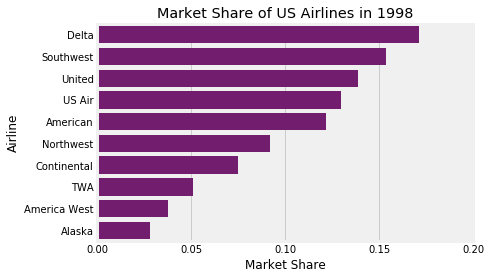

In [98]:
ticks98 = np.arange(0,max98+.05, .05)
tnames98 = ['{:0.2f}'.format(i) for i in ticks98]
airline_order = (df98clean.Airline.value_counts()).index
ytnames98 = ['Delta','Southwest','United','US Air','American','Northwest',
                'Continental','TWA','America West','Alaska']
sb.countplot(data=df98clean,y='Airline',order=(df98clean.Airline.value_counts()).index,color=sb.color_palette()[5])
plt.xticks(ticks98*flights98,tnames98)
plt.yticks(np.arange(10),ytnames98)
#plt.set(yticklabels = )
plt.title('Market Share of US Airlines in 1998')
plt.xlabel('Market Share');


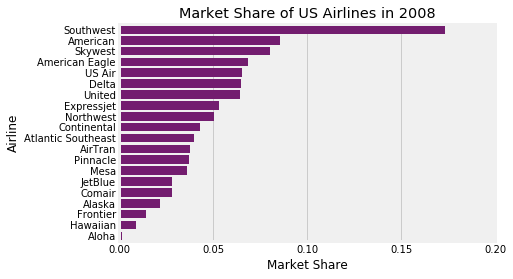

In [67]:
ticks08 = np.arange(0,max08+.05, .05)
tnames08 = ['{:0.2f}'.format(i) for i in ticks08]
ytnames08 = ['Southwest','American','Skywest','American Eagle','US Air','Delta','United','Expressjet','Northwest',
            'Continental','Atlantic Southeast','AirTran','Pinnacle','Mesa','JetBlue','Comair','Alaska',
            'Frontier','Hawaiian','Aloha']
airline_order = (df08clean.Airline.value_counts()).index
sb.countplot(data=df08clean,y='Airline',order=(df08clean.Airline.value_counts()).index,color=sb.color_palette()[5])
plt.xticks(ticks08*flights08,tnames08)
plt.yticks(np.arange(20),ytnames08)
plt.title('Market Share of US Airlines in 2008')
plt.xlabel('Market Share');


In [68]:
numcar98 = len(df98clean.Airline.unique())
numcar08 = len(df08clean.Airline.unique())
print( numcar98,numcar08)

10 20


Over the decade from 1998 to 2008 Southwest became the largest airline, increasing their market share from 15.1% to 17.1%. More interestingly, market share became much less evenly distributed. With the entry of 10 more airlines* and Southwest slightly increasing their share, the other major airlines in 1998 all lost significantly.

\* This might be a change in airlines reporting into the system, rather than an actual increase in airlines

Now lets look at overall delays.

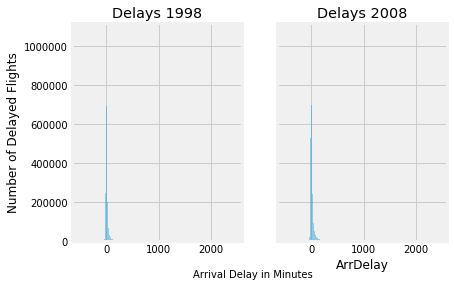

In [69]:
dbins = np.arange(df08clean.ArrDelay.min(),df08clean.ArrDelay.max(),5)
f, axes = plt.subplots(1,2,sharex='all',sharey='all')
sb.distplot(df98clean.ArrDelay,ax=axes[0],kde=False,bins=dbins)
sb.distplot(df08clean.ArrDelay, ax=axes[1],kde=False,bins=dbins)
f.text(0.5,0,'Arrival Delay in Minutes',ha='center')
axes[0].set_xlabel('')
axes[0].set_ylabel('Number of Delayed Flights')
axes[0].set_title('Delays 1998')
axes[1].set_title('Delays 2008');


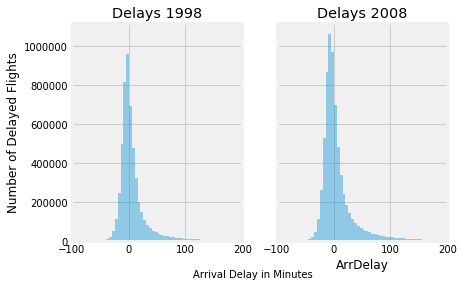

In [71]:
f, axes = plt.subplots(1,2,sharex='all',sharey='all')
sb.distplot(df98clean.ArrDelay,ax=axes[0],kde=False,bins=dbins)
sb.distplot(df08clean.ArrDelay, ax=axes[1],kde=False,bins=dbins)
f.text(0.5,0,'Arrival Delay in Minutes',ha='center')
plt.xlim(-100,200)
axes[0].set_xlabel('')
axes[0].set_ylabel('Number of Delayed Flights')
axes[0].set_title('Delays 1998')
axes[1].set_title('Delays 2008');


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The shape of the delay distributions has remained the same over the decade from 1998-2008. This indicates that there have been no major, structural changes that have significantly improved or worsened delays in that decade.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There were no unusual distributions identified.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

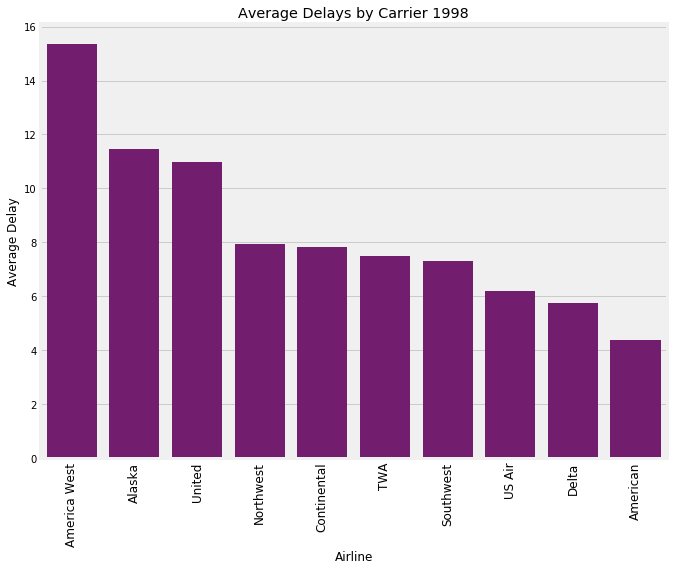

In [97]:
# carrier_delay98 = df98clean.groupby(['Airline'])['ArrDelay'].mean().reset_index().rename(columns={0:'avg_delay'})
delay_order = carrier_delay98.sort_values('ArrDelay', ascending=False)
plt.figure(figsize=[10,8])
base_color= sb.color_palette()[5]
sb.barplot(data= delay_order, x='Airline', y='ArrDelay', color=base_color,)
plt.xticks(np.arange(10), ('America West','Alaska','United','Northwest','Continental','TWA','Southwest','US Air','Delta','American'), rotation=90, fontsize = 12)
plt.ylabel('Average Delay')
plt.title('Average Delays by Carrier 1998');

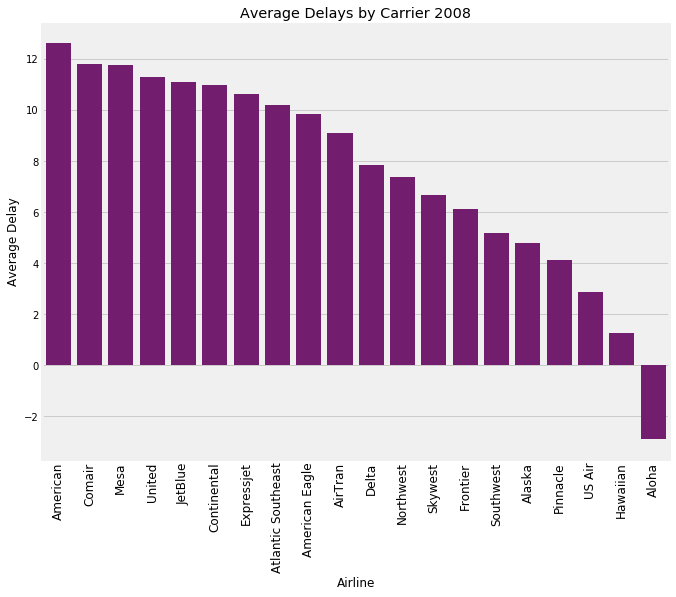

In [95]:
carrier_delay = df08clean.groupby(['Airline'])['ArrDelay'].mean().reset_index().rename(columns={0:'avg_delay'})
delay_order = carrier_delay.sort_values('ArrDelay', ascending=False)
plt.figure(figsize=[10,8])
base_color= sb.color_palette()[5]
sb.barplot(data= delay_order, x='Airline', y='ArrDelay', color=base_color)
plt.xticks(np.arange(20), ('American','Comair','Mesa','United','JetBlue','Continental','Expressjet','Atlantic Southeast',
                           'American Eagle','AirTran','Delta','Northwest','Skywest','Frontier','Southwest','Alaska','Pinnacle',
                           'US Air','Hawaiian','Aloha'), rotation=90, fontsize = 12)
plt.ylabel('Average Delay')
plt.title('Average Delays by Carrier 2008');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> American Airlines went from having the best on-time record in 1998 to having the worst in 2008. That said, no airline in 2008 had average delays worse than the worst airline in 1998.

## Multivariate Exploration

In [91]:
# There is an excellent tutorial on predicting flight delays at kaggle.
# https://www.kaggle.com/fabiendaniel/predicting-flight-delays-tutorial/notebook
# Group using function: no delay <= 10 minutes, medium delay >10 but < 1 hour, long delay > 1 hour
delay = lambda x: ((0,1)[x>10],2)[x>60]
df98clean['delay'] = df98clean['ArrDelay'].apply(delay)

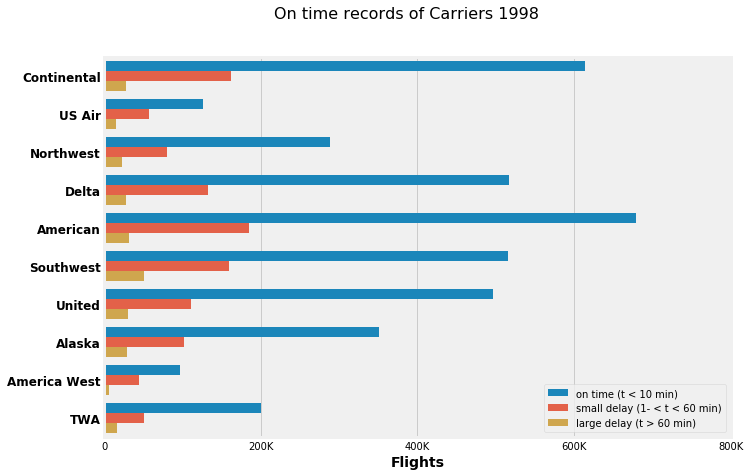

In [92]:
fig = plt.figure(1,figsize=(10,7))
ax = sb.countplot(y='Airline', hue= 'delay', data= df98clean)
ax.yaxis.label.set_visible(False)
plt.xlabel('Flights', fontsize=14, weight = 'bold')
plt.xticks([0, 2e5, 4e5, 6e5, 8e5], ['0', '200K', '400K', '600K', '800K'])
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold');
fig.suptitle('On time records of Carriers 1998',fontsize=16)
ax.set_yticklabels({'Southwest','America West','Continental','US Air','Delta','United','American','Northwest','Alaska','TWA'})
legend = plt.legend()
legend.get_texts()[0].set_text('on time (t < 10 min)')
legend.get_texts()[1].set_text('small delay (1- < t < 60 min)')
legend.get_texts()[2].set_text('large delay (t > 60 min)')

In [93]:
delay08 = lambda x: ((0,1)[x>10],2)[x>60]
df08clean['delay'] = df08clean['ArrDelay'].apply(delay08)

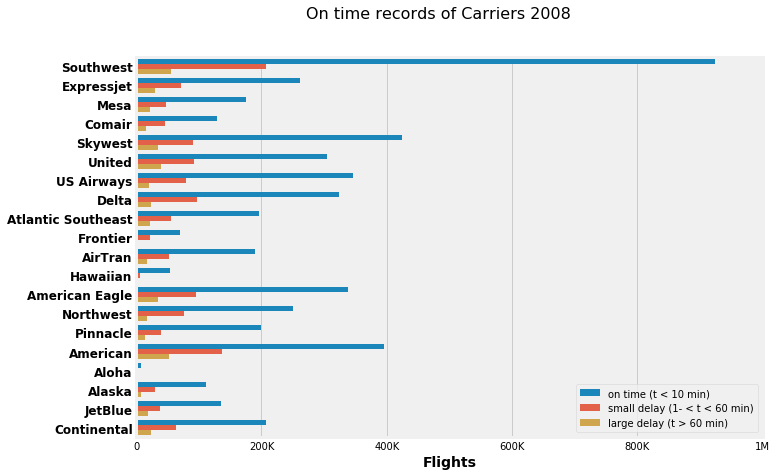

In [94]:
fig = plt.figure(1, figsize=(10,7))
ax = sb.countplot(y='Airline', hue= 'delay', data= df08clean)
ax.yaxis.label.set_visible(False)
plt.xlabel('Flights', fontsize=14, weight = 'bold')
plt.xticks([0, 2e5, 4e5, 6e5, 8e5,1e6], ['0', '200K', '400K', '600K', '800K','1M'])
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold');
fig.suptitle('On time records of Carriers 2008',fontsize=16)
yticks = [item.get_text() for item in ax.get_yticklabels()]
yticks = ['Southwest','Expressjet','Mesa','Comair','Skywest','United','US Airways','Delta','Atlantic Southeast','Frontier',
          'AirTran','Hawaiian','American Eagle','Northwest','Pinnacle','American','Aloha','Alaska','JetBlue','Continental']
ax.set_yticklabels(yticks)
legend = plt.legend()
legend.get_texts()[0].set_text('on time (t < 10 min)')
legend.get_texts()[1].set_text('small delay (1- < t < 60 min)')
legend.get_texts()[2].set_text('large delay (t > 60 min)')
plt.show()

## Summary of Findings

### Market Share
Southwest airlines moved from second place to first in market share between the years 1998 and 2008. Their actual market share only increased by ~2%, while the other airlines' shares in the market were eroded by the entrance of many "new" airlines. Note: this may be due to more airlines voluntarily sharing their information in 2008 rather than a real entrance of 10 new airlines in the intervening decade.

### Overall On-Time records
There was not a big change in the worst on-time record between 1998 and 2008, although American Airlines has the dubious distinction of having the best record in 1998 and dropping to the worst by 2008. The data also show that Hawaii is a good destination if your goal is to arrive on time, with Hawaiian Air and Aloha Air having the best records in 2008.

### On-time vs small delay vs long delay
Southwest went from being tied for 3rd in 1998 to being the airline with the best record (least long elays relative to numbers of flights) of the largest carriers.

## Key Insights

Fly Southwest. Go to Hawaii. Overall, this dataset is rich and would allow for a lot of good analyis. For example: looking at which airports are best for on time arrivals, or which whether on-time odds are better for short or long flights. The 2008 data set would allow analysis of which delay causes result in the longest delays. The 1998 dataset does not contain this data.

Overall, while individual airlines' records changed over the decade, flight delays have not significantly increased or decreased.